In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
data=pd.read_csv('C:\\Users\\Admi\\Desktop\\Assignment\\Excel R Assignment  5  MLR\\50_Startups.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


## Corrolation matrix

In [5]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


## Scatterplot between variables along with histograms

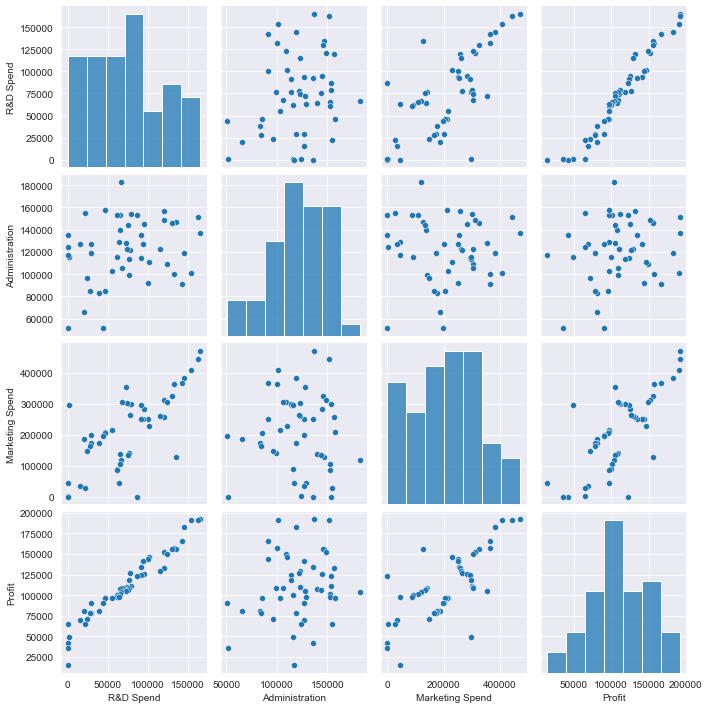

In [6]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data)

## Fitting model

In [7]:
model=smf.ols('Profit~Q("R&D Spend") + Administration +Q("Marketing Spend")',data=data).fit()

In [8]:
#Coefficients
model.params

Intercept               50122.192990
Q("R&D Spend")              0.805715
Administration             -0.026816
Q("Marketing Spend")        0.027228
dtype: float64

In [9]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept                7.626218
Q("R&D Spend")          17.846374
Administration          -0.525507
Q("Marketing Spend")     1.655077
dtype: float64 
 Intercept               1.057379e-09
Q("R&D Spend")          2.634968e-22
Administration          6.017551e-01
Q("Marketing Spend")    1.047168e-01
dtype: float64


In [10]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [11]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [12]:
data.duplicated().sum()

0

## Residual plot

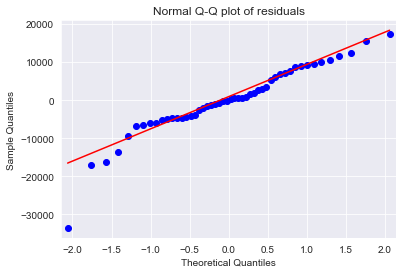

In [13]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [14]:
d1=list(np.where(model.resid>10000))
d1

[array([10, 12, 16, 36, 38, 45], dtype=int32)]

In [15]:
datanew=d1

In [16]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

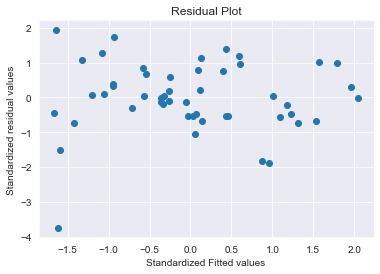

In [17]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Cooks distance

In [18]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

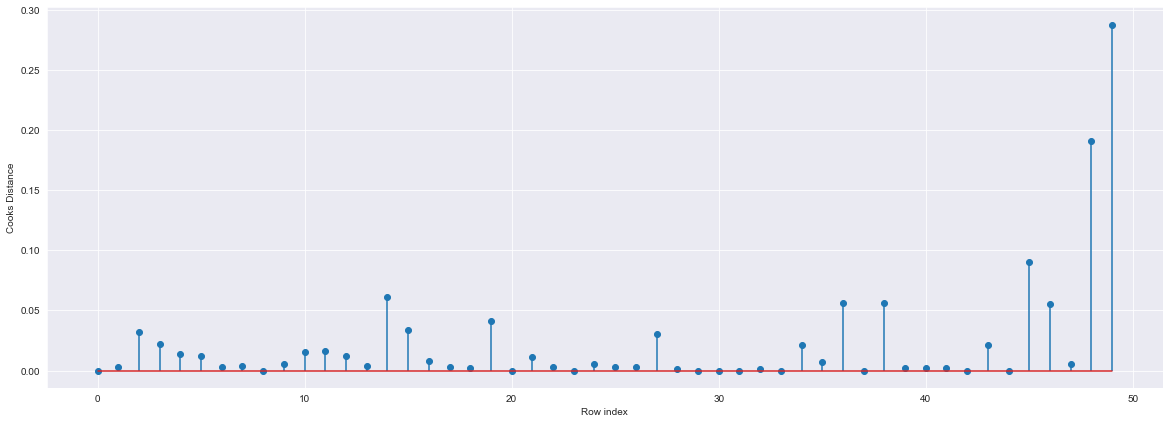

In [19]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [20]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432673)

In [21]:
data1=data.drop(data.index[[47]],axis=0).reset_index()

In [22]:
final_model=smf.ols('Profit~Q("R&D Spend") + Administration +Q("Marketing Spend")',data=data1).fit()

In [23]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

#  predict for new value

In [24]:
print(final_model.predict(data1))

0     192276.620090
1     188970.433674
2     181883.161332
3     173510.584856
4     171903.470561
5     163390.235295
6     158176.665575
7     159968.425505
8     151726.135968
9     154770.611829
10    135495.008253
11    135504.579358
12    129169.733490
13    127541.824030
14    149587.333601
15    146201.296858
16    116960.300627
17    130244.784951
18    128991.222355
19    115901.234880
20    116648.747654
21    117418.978652
22    114739.743091
23    110002.181842
24    113432.926401
25    102434.208446
26    110786.313234
27    114426.500365
28    101969.232008
29    102040.802086
30     99626.370870
31     97954.714289
32     99232.620434
33     97997.128045
34     89275.704818
35     90577.549903
36     75495.197356
37     89613.958126
38     69788.451580
39     83825.772997
40     75021.825526
41     74934.170995
42     70799.453392
43     60509.071505
44     65008.648245
45     48038.605242
46     56350.874421
47     49387.449045
48     48561.366343
dtype: float64
